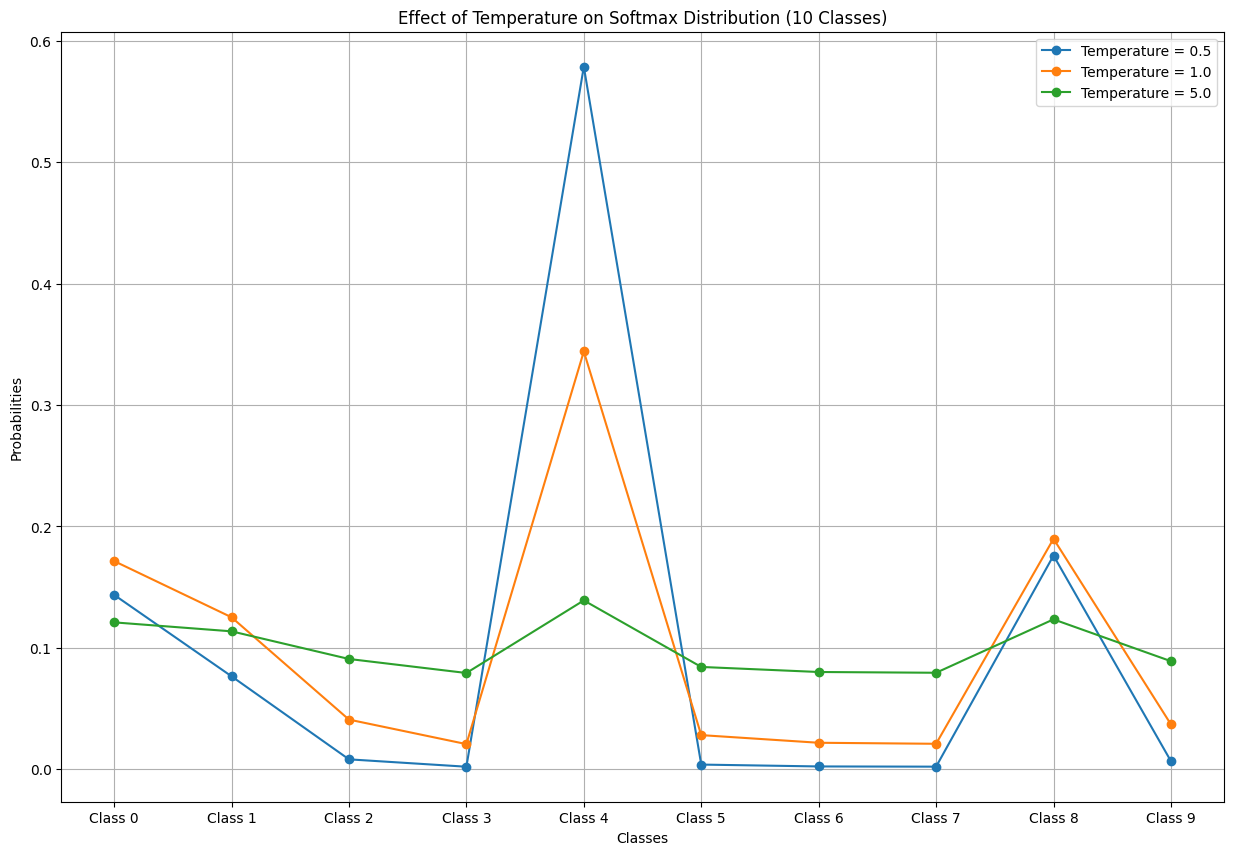

In [15]:
# Sample logits for 10 classes, assuming that Class 2 is the most probable followed by Class 7 and Class 0
import numpy as np
import matplotlib.pyplot as plt
logits_10_classes = np.random.randn(10)

plt.figure(figsize=(15, 10))
selected_temperatures = [0.5, 1.0, 5.0]
for temp in selected_temperatures:
    probs = np.exp(logits_10_classes / temp)
    probs = probs / np.sum(probs)
    plt.plot(probs, label=f'Temperature = {temp}', marker='o')

plt.title('Effect of Temperature on Softmax Distribution (10 Classes)')
plt.xlabel('Classes')
plt.ylabel('Probabilities')
plt.xticks(ticks=range(10), labels=[f'Class {i}' for i in range(10)])
plt.legend()
plt.grid(True)
plt.show()


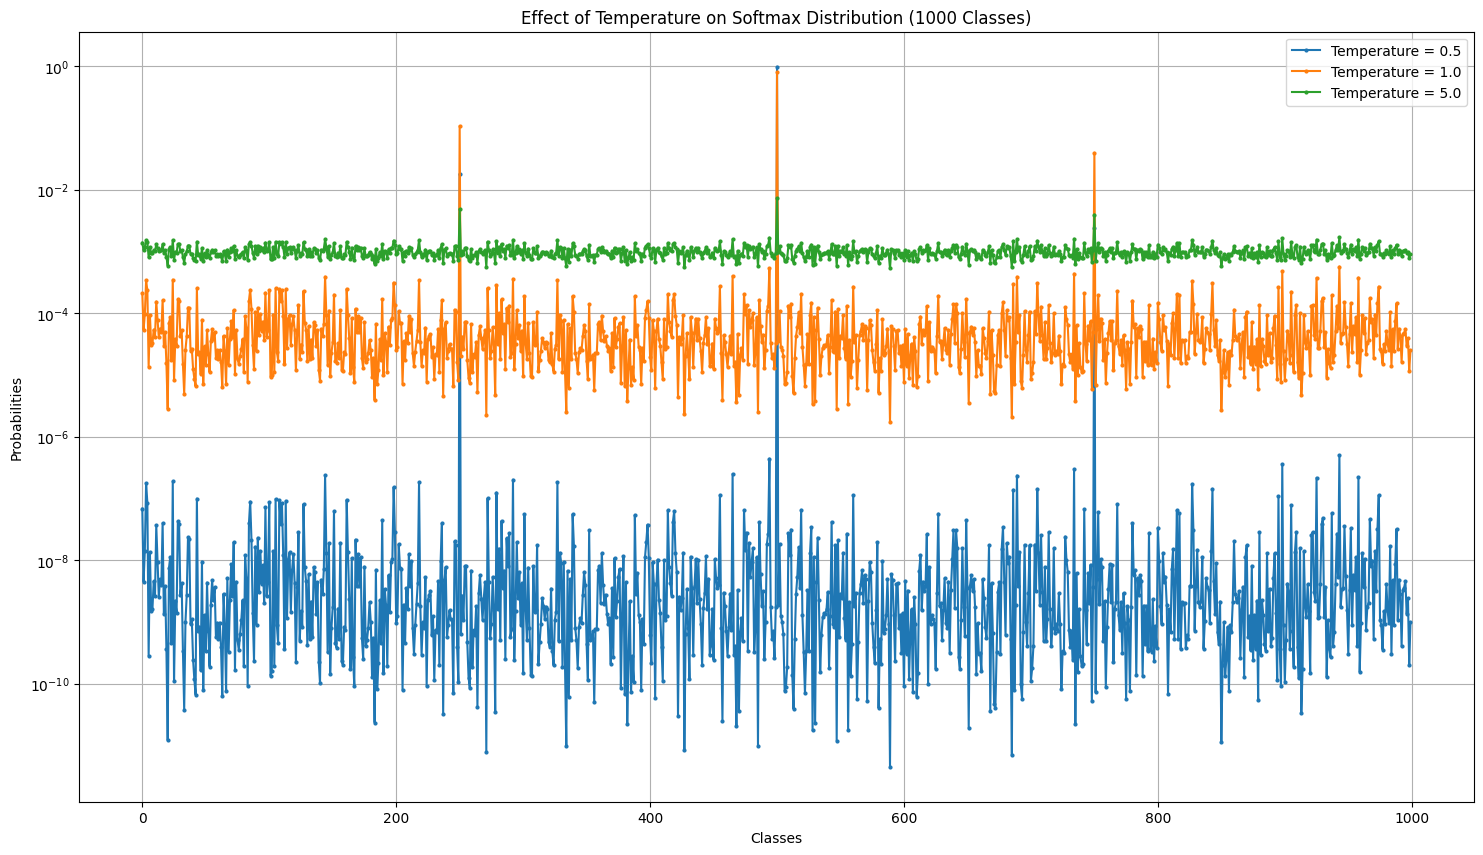

In [8]:
# Sample logits for 1000 classes, assuming that Class 500 is the most probable, followed by Class 250 and Class 750
np.random.seed(0)
logits_1000_classes = np.random.randn(1000)  # Random logits
logits_1000_classes[500] = 10.0  # Making Class 500 the most probable
logits_1000_classes[250] = 8.0  # Making Class 250 the second most probable
logits_1000_classes[750] = 7.0  # Making Class 750 the third most probable

plt.figure(figsize=(18, 10))

# Due to a large number of classes, plotting for selected temperatures only
selected_temperatures = [0.5, 1.0, 5.0]
for temp in selected_temperatures:
    probs = np.exp(logits_1000_classes / temp)
    probs = probs / np.sum(probs)
    plt.plot(probs, label=f'Temperature = {temp}', marker='o', markersize=2)

plt.title('Effect of Temperature on Softmax Distribution (1000 Classes)')
plt.xlabel('Classes')
plt.ylabel('Probabilities')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Using a log scale for better visualization
plt.show()


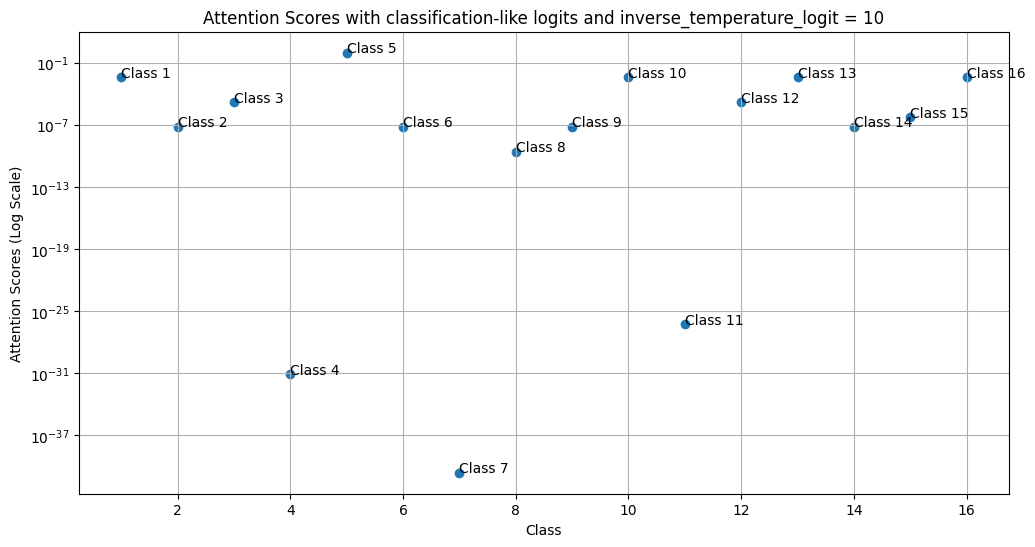

In [5]:
# Complete code for generating and plotting attention scores based on classification-like logits and inverse_temperature_logit

import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Softplus activation
def softplus(x):
    return np.log(1 + np.exp(x))

# Classification-like logits for 16 classes
classification_logits = np.array([-2, -1, -1.5, 4, -2.5, -1, 6, -0.5, -1, -2, 3, -1.5, -2, -1, -1.2, -2])

# inverse_temperature_logit
inverse_temperature_logit = 10
softplus_inverse_temperature = softplus(inverse_temperature_logit)

# Calculate the attention scores
attention_scores_classification = np.exp(-classification_logits * (softplus_inverse_temperature + 1))
attention_scores_classification = attention_scores_classification / np.sum(attention_scores_classification)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(range(1, 17), attention_scores_classification, marker='o')
# plt.yscale('log')
for i in range(16):
    plt.annotate(f'Class {i+1}', (i+1, attention_scores_classification[i]))
plt.xlabel('Class')
plt.ylabel('Attention Scores (Log Scale)')
plt.title(f'Attention Scores with classification-like logits and inverse_temperature_logit = {inverse_temperature_logit}')
plt.grid(True)
plt.show()


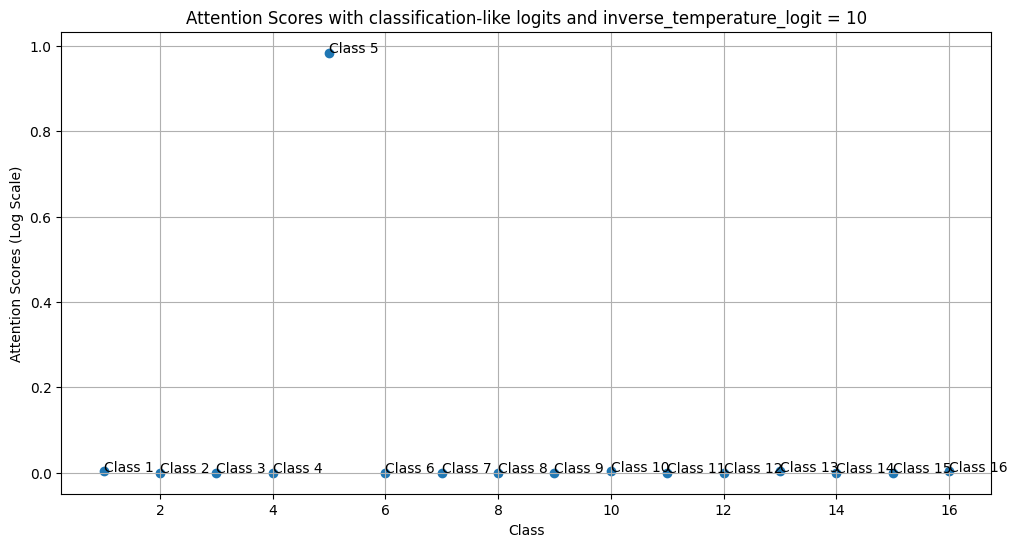

In [6]:
# Complete code for generating and plotting attention scores based on classification-like logits and inverse_temperature_logit

import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Softplus activation
def softplus(x):
    return np.log(1 + np.exp(x))

# Classification-like logits for 16 classes
classification_logits = np.array([-2, -1, -1.5, 4, -2.5, -1, 6, -0.5, -1, -2, 3, -1.5, -2, -1, -1.2, -2])

# inverse_temperature_logit
inverse_temperature_logit = 10
softplus_inverse_temperature = softplus(inverse_temperature_logit)

# Calculate the attention scores
attention_scores_classification = np.exp(-classification_logits * (softplus_inverse_temperature + 1))
attention_scores_classification = attention_scores_classification / np.sum(attention_scores_classification)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(range(1, 17), attention_scores_classification, marker='o')
# plt.yscale('log')
for i in range(16):
    plt.annotate(f'Class {i+1}', (i+1, attention_scores_classification[i]))
plt.xlabel('Class')
plt.ylabel('Attention Scores (Log Scale)')
plt.title(f'Attention Scores with classification-like logits and inverse_temperature_logit = {inverse_temperature_logit}')
plt.grid(True)
plt.show()


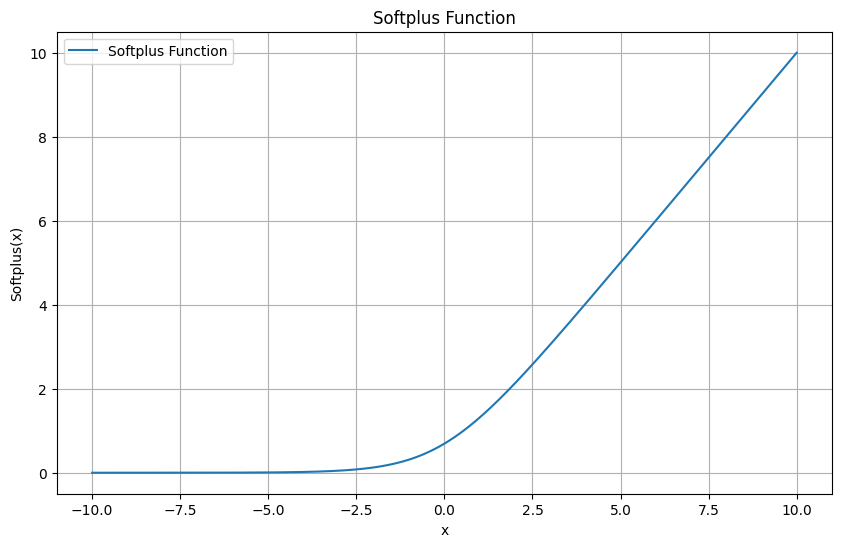

In [7]:
x_values = np.linspace(-10, 10, 400)
y_values = softplus(x_values)

# Plotting the Softplus function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Softplus Function')
plt.xlabel('x')
plt.ylabel('Softplus(x)')
plt.title('Softplus Function')
plt.grid(True)
plt.legend()
plt.show()


In [1]:
import timm

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
float_model = timm.create_model("deit3_small_patch16_224.fb_in1k", pretrained=False)

In [4]:
float_model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identit

In [6]:
data_config = timm.data.resolve_model_data_config(float_model)
val_transform = timm.data.create_transform(**data_config, is_training=False)
tarin_transform = timm.data.create_transform(**data_config, is_training=True)


In [7]:
tarin_transform

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)